<a href="https://colab.research.google.com/github/ecordeiro/cefet/blob/main/pymoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
#!pip install pymoo

Class development

In [126]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.problem import Problem
import math

In [127]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=30, n_obj=2, n_constr=0, xl=0.0, xu=1.0, type_var=np.double)

    def g(self, x):
        """
        Calcula a função g(x_2, ..., x_D) conforme a definição.
        """
        D = len(x)
        sum_term = np.sum(x[1:])  # Soma dos elementos de x a partir do segundo (x_2, ..., x_D)
        g_value = 1 + 9 * sum_term / (D - 1)
        return g_value


    def h(self, f1, g_value):
        """
        Calcula a função h(f_1, g) conforme a definição.
        """
        h_value = 1 - np.sqrt(f1 / g_value)
        return h_value

    def f1(self, x):
        """
        Calcula a função f_1(x) que é simplesmente x_1.
        """
        return x[0]

    def _evaluate(self, x, out, *args, **kwargs):

        """
        Calcula a função f_2(x) = g * h.
        """
        f1_value = self.f1(x)
        g_value = self.g(x)
        h_value = self.h(f1_value, g_value)
        f2_value = g_value * h_value

        out["F"] = np.column_stack([f1_value, f2_value])


problem = MyProblem()

Initializing the Algorithm

In [128]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

In [129]:
algorithm = NSGA2(
    pop_size=200,
    n_offsprings = 50,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob=0.8, eta=20),
    mutation = PM(eta = 25),
    eliminate_duplicates = True
)

In [130]:
from pymoo.termination import get_termination
termination = get_termination("n_gen",1000)

Optimization Process

In [131]:
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

res = minimize(
    problem,
    algorithm,
    termination,
    #seed =  7,
    seve_history = True,
    verbose = True
)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      200 |     16 |             - |             -
     2 |      250 |     17 |  0.0065438315 |         nadir
     3 |      300 |     17 |  0.0436380418 |         nadir
     4 |      350 |     16 |  0.0886972163 |         nadir
     5 |      400 |     10 |  0.0540781520 |         ideal
     6 |      450 |     10 |  0.1038403447 |         nadir
     7 |      500 |     11 |  0.0368010327 |             f
     8 |      550 |     12 |  0.0140040118 |             f
     9 |      600 |     11 |  0.0461656083 |             f
    10 |      650 |     15 |  0.0331057895 |         ideal
    11 |      700 |     16 |  0.0148941438 |             f
    12 |      750 |     15 |  0.0100080321 |         ideal
    13 |      800 |     17 |  0.0565227040 |         ideal
    14 |      850 |     15 |  0.0178285889 |         ideal
    15 |      900 |     16 |  0.2341153420 |         nadir
    16 |      950 |     18 |  0.0077742166 |            

In [132]:
res.X

array([[7.65190334e-11, 6.28321215e-06, 1.86576356e-05, ...,
        5.85681798e-06, 1.53679867e-05, 1.93088967e-05],
       [9.99998847e-01, 3.13940189e-05, 4.75605404e-07, ...,
        1.58432077e-05, 1.37310332e-05, 2.25990637e-07],
       [8.20331477e-01, 1.14194284e-06, 6.58575904e-06, ...,
        1.44998748e-05, 1.70587630e-05, 3.53358662e-05],
       ...,
       [1.10477738e-01, 2.28327004e-06, 8.23490446e-05, ...,
        8.88433394e-07, 3.13943292e-05, 5.31872222e-05],
       [1.10502237e-01, 3.20008092e-05, 5.87201566e-06, ...,
        1.33373614e-05, 1.14984697e-05, 3.93927742e-06],
       [4.09588322e-02, 6.08437702e-06, 2.46135827e-05, ...,
        1.56932270e-05, 2.24726970e-05, 5.04877551e-05]])

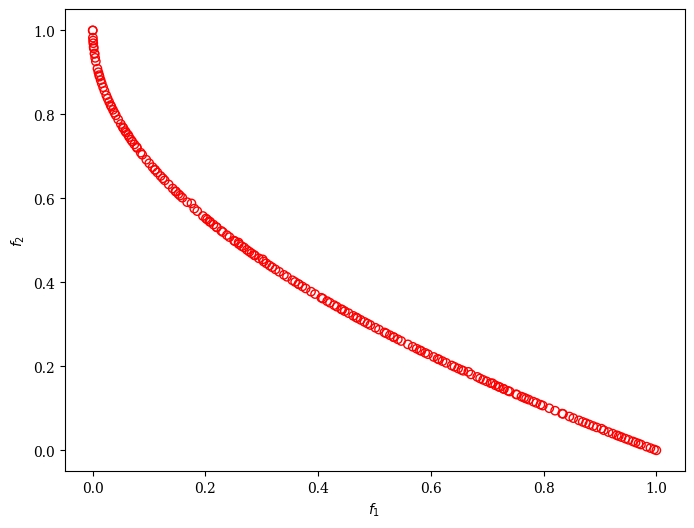

In [133]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()